In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [0]:
#load data
dataframe = pandas.read_csv("iris.csv",header=None)
dataset = dataframe.values
X = dataset[:,0:4]
Y = dataset[:,4:5]

In [6]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y
# same work but in short way 
#encoded_Y = encoder.fit_transform(Y) 


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

**BASELINE MODEL**

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
# define baseline model
def baseline_model():
  model = models.Sequential()
  model.add(layers.Dense(15,input_shape=(4,),activation="relu"))
  model.add(layers.Dense(3,activation="softmax"))
  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model

In [0]:
history1 = baseline_model().fit(X ,dummy_y ,epochs=200 , batch_size=5 , verbose = 0) 

In [0]:
history_dict1 = history1.history
history_dict1.keys()
# accuracy and loss
acc = history_dict1["acc"]
bl_model_acc = max(acc)              # Maximum accuracy of baseline model

loss = history_dict1["loss"]
bl_model_loss = min(loss)

print("Maximum accuracy of base line model is ", bl_model_acc , "and minimum loss is" , bl_model_loss )


Maximum accuracy of base line model is  0.98 and minimum loss is 0.08810014907891552


***TUNED MODEL***

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
# define baseline model
def tunedmodel():
  model = models.Sequential()
  model.add(layers.Dense(150,input_shape=(4,),activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(55))
  model.add(layers.Dense(40))
  model.add(layers.Dense(10))
  model.add(layers.Dense(3,activation="softmax"))
  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model
history2 = tunedmodel().fit(X ,dummy_y ,epochs=200 , batch_size=5 , verbose = 0)

In [0]:
# accuracy and loss of tuned model
acc = history2.history["acc"]
tuned_model_acc = max(acc)             # maximum accuracy
loss = history2.history["loss"]
tuned_model_loss = min(loss)          # minimuum loss
print("Minimum loss of tuned model is " ,tuned_model_loss , ", Maximum acc of tuned model is" ,tuned_model_acc )

Minimum loss of tuned model is  0.04491651079733856 , Maximum acc of tuned model is 0.99333334


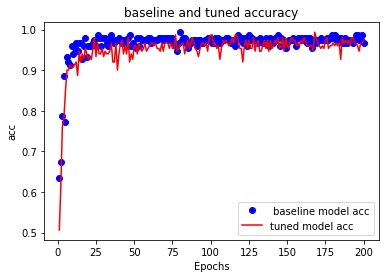

In [0]:
#Plotting the training and validation accuracy
plt.clf()
bl_acc = history_dict1['acc']
tuned_acc = history_dict2['acc']
epochs = range(1, len(bl_acc) + 1)
plt.plot(epochs, bl_acc, 'bo', label=' baseline model acc')
plt.plot(epochs, tuned_acc, 'r-', label='tuned model acc')
plt.title('baseline and tuned accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [0]:
# k fold valodation using sklearn libraries
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [0]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [0]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 96.00% (5.33%)


***k fold validation without using sklearn libraries***

In [37]:
k = 5
num_val_samples = len(X) // 5
num_epochs = 100
all_scores = numpy.array([])

for i in range(k):
  print('processing fold # ', i+1)
  # prepare the validation data: data from partition # k
  val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = dummy_y[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
  partial_train_data = numpy.concatenate(                    
      [X[:i * num_val_samples],
      X[(i + 1 ) * num_val_samples:]],
  axis = 0)
  partial_train_targets = numpy.concatenate(
      [dummy_y[:i * num_val_samples],
      dummy_y[(i + 1 ) * num_val_samples:]],
  axis = 0)
  
  # Build the Keras Models (already commpiled)
  model = tunedmodel()
  
  # Train the model (in silence mode, verbose = 0)
  history4 = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 5, verbose = 0)
  
  # Evaluate the model on the validation data
  val_binary_crossentropy, val_adam = model.evaluate(val_data, val_targets, verbose = 0)
  
  all_scores = numpy.append(all_scores, val_adam)
  print("K-Fold Witout Scikit-learn : (Accuracy)Mean %.2f%% (Error)Std (%.2f%%)" % (all_scores.mean()*100, all_scores.std()*100))

processing fold #  1
K-Fold Witout Scikit-learn : (Accuracy)Mean 100.00% (Error)Std (0.00%)
processing fold #  2
K-Fold Witout Scikit-learn : (Accuracy)Mean 100.00% (Error)Std (0.00%)
processing fold #  3
K-Fold Witout Scikit-learn : (Accuracy)Mean 98.89% (Error)Std (1.57%)
processing fold #  4
K-Fold Witout Scikit-learn : (Accuracy)Mean 99.17% (Error)Std (1.44%)
processing fold #  5
K-Fold Witout Scikit-learn : (Accuracy)Mean 99.33% (Error)Std (1.33%)
